In [30]:
# http://mattdturner.com/wordpress/2018/08/create-a-buffett-indicator-plot-in-python/

In [54]:
# Import necessary packages
# import datetime
from datetime import date, timedelta
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from dateutil.relativedelta import relativedelta
import seaborn as sns 

In [32]:
end = datetime.datetime.now()
start = end - relativedelta(years=3)

In [33]:
gdp = web.DataReader('GDP', 'fred', start, end)
wilshire = web.DataReader('WILL5000PR','fred',start,end)

In [34]:
print(gdp.tail())
print(wilshire.tail())

                  GDP
DATE                 
2019-10-01  21747.394
2020-01-01  21561.139
2020-04-01  19520.114
2020-07-01  21170.252
2020-10-01  21494.731
            WILL5000PR
DATE                  
2021-03-25    40798.60
2021-03-26    41467.50
2021-03-29    41300.85
2021-03-30    41259.22
2021-03-31    41465.83


In [35]:
combined = pd.concat([gdp,wilshire],axis=1)

In [36]:
print(combined.tail())

            GDP  WILL5000PR
DATE                       
2021-03-25  NaN    40798.60
2021-03-26  NaN    41467.50
2021-03-29  NaN    41300.85
2021-03-30  NaN    41259.22
2021-03-31  NaN    41465.83


In [37]:
# Get a list of dates available in the GDP dataframe
gdp_dates = gdp.index.values

# Loop through the dgp dates and fill the GDP column in the combined dataframe
prev_date = None
for date in gdp_dates:
    if prev_date == None:
        combined.loc[:date,'GDP'] = gdp.loc[date,'GDP']
    else:
        combined.loc[date_prev:date,'GDP'] = gdp.loc[date_prev,'GDP']
    date_prev = date
    
combined.loc[date:,'GDP'] = gdp.loc[date,'GDP']

In [38]:
print(combined.tail())

                  GDP  WILL5000PR
DATE                             
2021-03-25  21494.731    40798.60
2021-03-26  21494.731    41467.50
2021-03-29  21494.731    41300.85
2021-03-30  21494.731    41259.22
2021-03-31  21494.731    41465.83


In [39]:
combined['Buffett_Indicator'] = combined.WILL5000PR / combined.GDP * 100
print(combined.tail())

                  GDP  WILL5000PR  Buffett_Indicator
DATE                                                
2021-03-25  21494.731    40798.60         189.807446
2021-03-26  21494.731    41467.50         192.919372
2021-03-29  21494.731    41300.85         192.144065
2021-03-30  21494.731    41259.22         191.950390
2021-03-31  21494.731    41465.83         192.911602


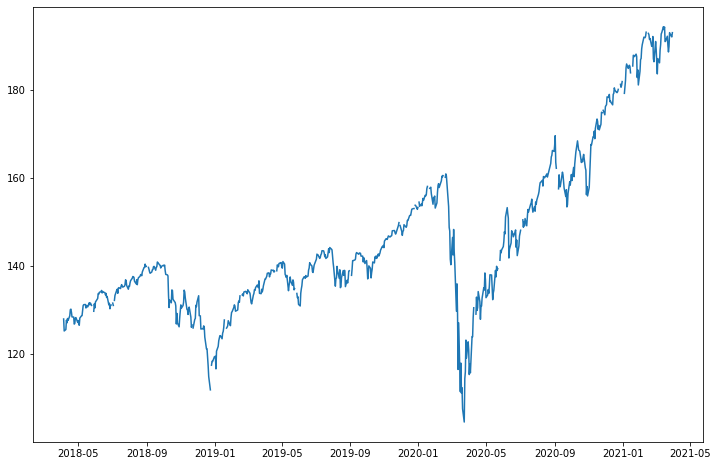

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

# Get the starting and ending date
min_date = combined.index.values[0]
max_date = combined.index.values[-1]
num_dates = len(combined.index.values)
quarter_date = combined.index.values[int(num_dates/4)]
three_quarter_date = combined.index.values[int(3*num_dates/4)]

plt.plot(combined.index.values,combined.Buffett_Indicator)

plt.show()

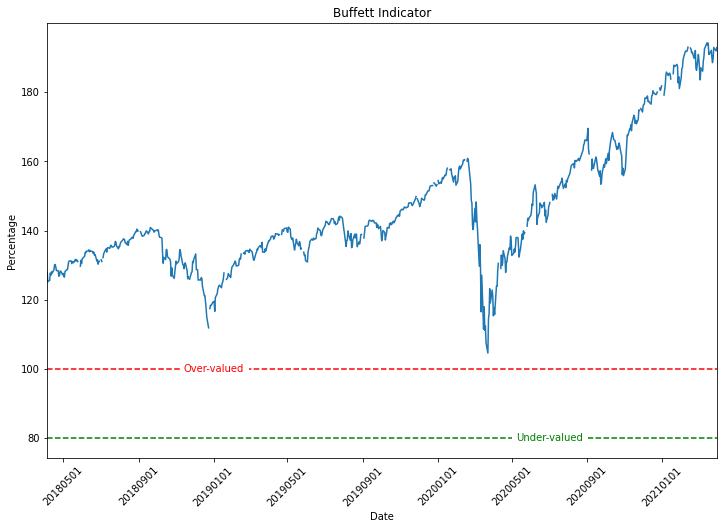

In [41]:
fig = plt.figure(figsize=(12,8))

plt.plot(combined.index.values,combined.Buffett_Indicator)

ax = plt.gca()

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y%m%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
ax.set_title('Buffett Indicator')
ax.set_xlim(min_date,max_date)

# Rotate the x-tick labels so that they are more legible
plt.xticks(rotation=45)

# Add the horizontal lines
plt.hlines(100,min_date,max_date,colors='r',linestyle='dashed')
plt.hlines(80,min_date,max_date,colors='g',linestyle='dashed')

plt.text(quarter_date,100,'Over-valued',ha='center',va='center',color='r',backgroundcolor='white')
plt.text(three_quarter_date,80,'Under-valued',ha='center',va='center',color='g',backgroundcolor='white')

plt.show()

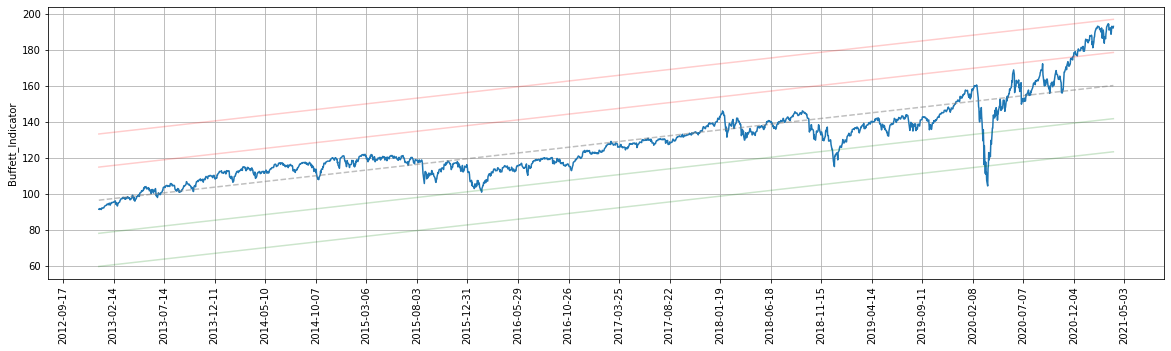

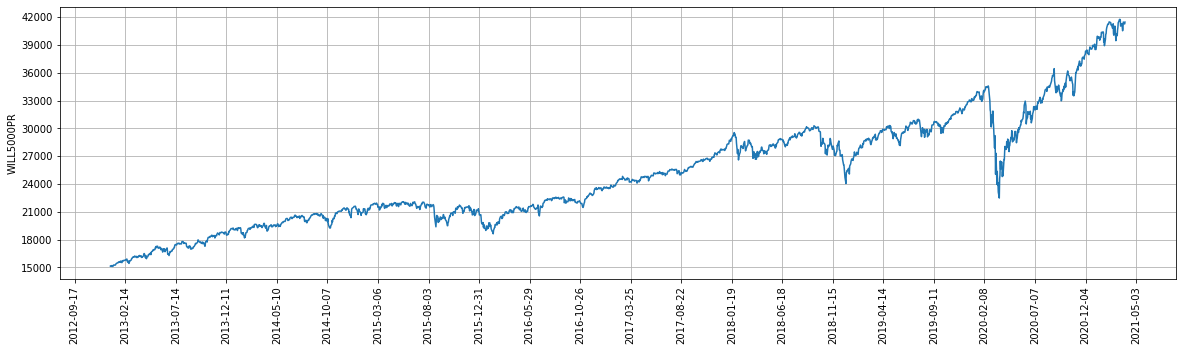

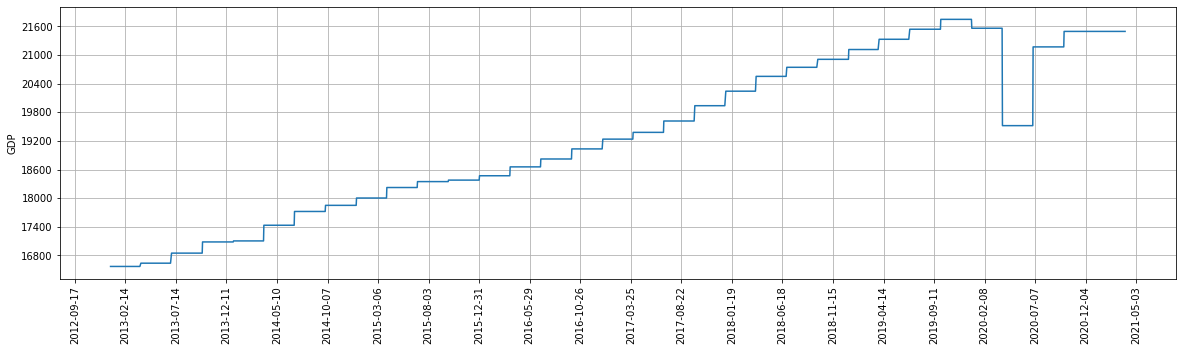

In [63]:
end = date.today().strftime("%Y-%m-%d")
start = '2013-01-01'
# Puxa GDP e Market Cap
gdp = web.DataReader('GDP', 'fred', start, end)
wilshire = web.DataReader('WILL5000PR','fred',start,end)
# Cruza bases
combined = pd.concat([gdp,wilshire],axis=1)
# Get a list of dates available in the GDP dataframe
gdp_dates = gdp.index.values
# # Loop through the dgp dates and fill the GDP column in the combined dataframe
# prev_date = None
# for date in gdp_dates:
#     if prev_date == None:
#         combined.loc[:date,'GDP'] = gdp.loc[date,'GDP']
#     else:
#         combined.loc[date_prev:date,'GDP'] = gdp.loc[date_prev,'GDP']
#     date_prev = date
# combined.loc[date:,'GDP'] = gdp.loc[date,'GDP']   
# Buffet indicator
# Fill NaN PIB 
combined['GDP'].fillna(method='ffill', inplace=True)
combined['WILL5000PR'].fillna(method='bfill', inplace=True)
combined['Buffett_Indicator'] = combined.WILL5000PR / combined.GDP * 100
# Linha de Tendëncia
combined['num_lin'] = np.arange(len(combined))
x = combined['num_lin']
op = combined['Buffett_Indicator']
coef = np.polyfit(x, op, 1)
combined['tend'] = coef[0] * x + coef[1]
# coef = np.polyfit(x, op, 2)
# combined['tend'] = coef[0] * x ** 2 + coef[1] * x + coef[2]
stdev = np.std(combined['tend'])
combined['stdev'] = combined['tend'] + stdev
combined['2stdev'] = combined['tend'] + stdev + stdev
combined['stdevneg'] = combined['tend'] - stdev
combined['2stdevneg'] = combined['tend'] - stdev - stdev
# Tira Date do Index
combined = combined.reset_index(level=['DATE'])
# PLOT WB Indicator GRAPH
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(x='DATE', y='Buffett_Indicator', data=combined, ax=ax)
ax = sns.lineplot(x='DATE', y='tend', data=combined, ax=ax, color = 'gray', alpha = 0.5,  ls="--")
ax = sns.lineplot(x='DATE', y='stdev', data=combined, ax=ax, color = 'red', alpha = 0.2)
ax = sns.lineplot(x='DATE', y='2stdev', data=combined, ax=ax, color = 'red', alpha = 0.2)
ax = sns.lineplot(x='DATE', y='stdevneg', data=combined, ax=ax, color = 'green', alpha = 0.2)
ax = sns.lineplot(x='DATE', y='2stdevneg', data=combined, ax=ax, color = 'green', alpha = 0.2)
plt.grid()
# X Axis
# plt.xlim(start_date, end_date)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.xaxis.label.set_visible(False)
# Y Axis
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
# st.pyplot(fig)
# st.write(combined)
# PLOT Market Cap
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(x='DATE', y='WILL5000PR', data=combined, ax=ax)
plt.grid()
# X Axis
# plt.xlim(start_date, end_date)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.xaxis.label.set_visible(False)
# Y Axis
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
# st.pyplot(fig)
# st.write(combined)
# PLOT GDP GRAPH
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(x='DATE', y='GDP', data=combined, ax=ax)
plt.grid()
# X Axis
# plt.xlim(start_date, end_date)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.xaxis.label.set_visible(False)
# Y Axis
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
# st.pyplot(fig)

In [64]:
combined

,DATE,GDP,WILL5000PR,Buffett_Indicator,num_lin,tend,stdev,2stdev,stdevneg,2stdevneg
0,2013-01-01,16569.591,15135.18,91.343112,0,96.338787,114.734454,133.130122,77.943119,59.547452
1,2013-01-02,16569.591,15135.18,91.343112,1,96.368303,114.763970,133.159638,77.972635,59.576968
2,2013-01-03,16569.591,15114.05,91.215589,2,96.397818,114.793486,133.189153,78.002151,59.606483
3,2013-01-04,16569.591,15194.64,91.701962,3,96.427334,114.823002,133.218669,78.031667,59.635999
4,2013-01-07,16569.591,15149.64,91.430380,4,96.456850,114.852517,133.248185,78.061182,59.665515
...,...,...,...,...,...,...,...,...,...,...
2154,2021-03-25,21494.731,40798.60,189.807446,2154,159.915676,178.311344,196.707011,141.520009,123.124342
2155,2021-03-26,21494.731,41467.50,192.919372,2155,159.945192,178.340860,196.736527,141.549525,123.153857
2156,2021-03-29,21494.731,41300.85,192.144065,2156,159.974708,178.370375,196.766043,141.579040,123.183373
2157,2021-03-30,21494.731,41259.22,191.950390,2157,160.004224,178.399891,196.795559,141.608556,123.212889


In [57]:
# Fill NaN PIB 
combined['GDP'].fillna(method='ffill', inplace=True)